# k-mer embedding method comparisons

## Visualization and Comparison of k-mer embedding methods:

### k-mer normalization:

1. autometa CLR transform (`am_clr`)
2. ILR transform (`ilr`)

### k-mer embedding:

1. UMAP (`umap`)
2. BH-tSNE (`bhsne`)

### Datasets:

Metagenome wide:

1. `FL2015_4.kmers.am_clr.bhsne.tsv`
2. `FL2015_4.kmers.am_clr.umap.tsv`
3. `FL2015_4.kmers.ilr.bhsne.tsv`
4. `FL2015_4.kmers.ilr.umap.tsv`

Bacterial subset of embeddings:

1. `FL2015_4.kmers.bacteria.am_clr.bhsne.tsv`
2. `FL2015_4.kmers.bacteria.am_clr.umap.tsv`
3. `FL2015_4.kmers.bacteria.ilr.bhsne.tsv`
4. `FL2015_4.kmers.bacteria.ilr.umap.tsv`

Bacterial Neighborhood subset of embeddings:

1. `FL2015_4.kmers.neighborhood.am_clr.bhsne.tsv`
2. `FL2015_4.kmers.neighborhood.am_clr.umap.tsv`
3. `FL2015_4.kmers.neighborhood.ilr.bhsne.tsv`
4. `FL2015_4.kmers.neighborhood.ilr.umap.tsv`



In [1]:
import os
import attr

import pandas as pd
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots
from IPython.display import Image

In [2]:
@attr.s
class embedding:
    embedding = attr.ib(attr.validators.instance_of(str))
    taxonomy = attr.ib(attr.validators.instance_of(str))
    norm_method = attr.ib(attr.validators.instance_of(str))
    embed_method = attr.ib(attr.validators.instance_of(str))

    def plot(self, out=None):
        fig = go.Figure()
        df = pd.read_csv(self.embedding, sep='\t', index_col='contig')
        taxa = pd.read_csv(self.taxonomy, sep='\t', index_col='contig')
        df = pd.merge(df, taxa, left_index=True, right_index=True, how='left')
        for colname, dff in df.groupby("superkingdom"):
            trace = go.Scattergl(
                x=dff['x'],
                y=dff['y'],
                mode='markers',
                text=dff.index,
                hovertemplate="Contig: %{text}",
                name=colname)
            fig.add_trace(trace)
        fig.update_layout(template='simple_white', showlegend=True)
        if out:
            fig.write_image(out)
        return df, fig

In [3]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"

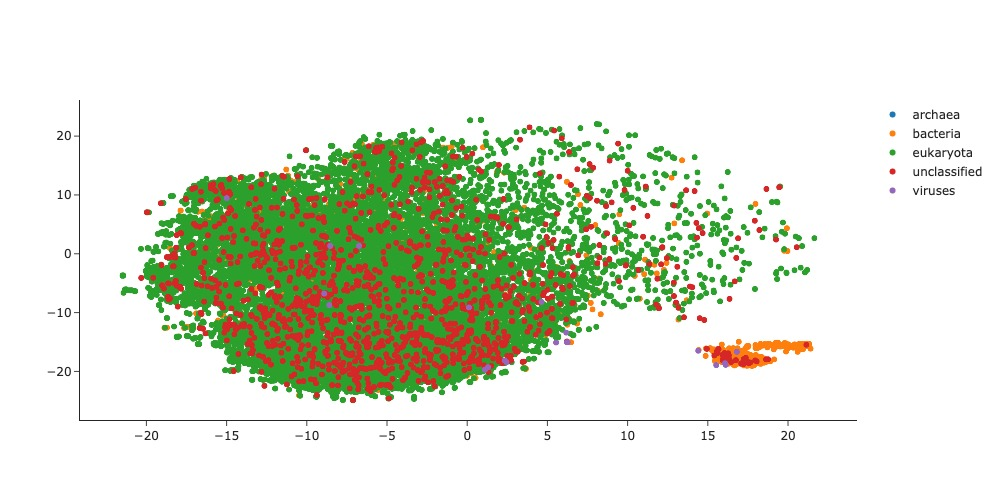

In [4]:
embedded_kmers = "../data/interim/binning/FL2015_4.kmers.am_clr.bhsne.tsv"
embed_method = "bhsne"
norm_method = "am_clr"
embedded = embedding(embedding=embedded_kmers, embed_method=embed_method, norm_method=norm_method, taxonomy=taxonomy)
df, fig = embedded.plot()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

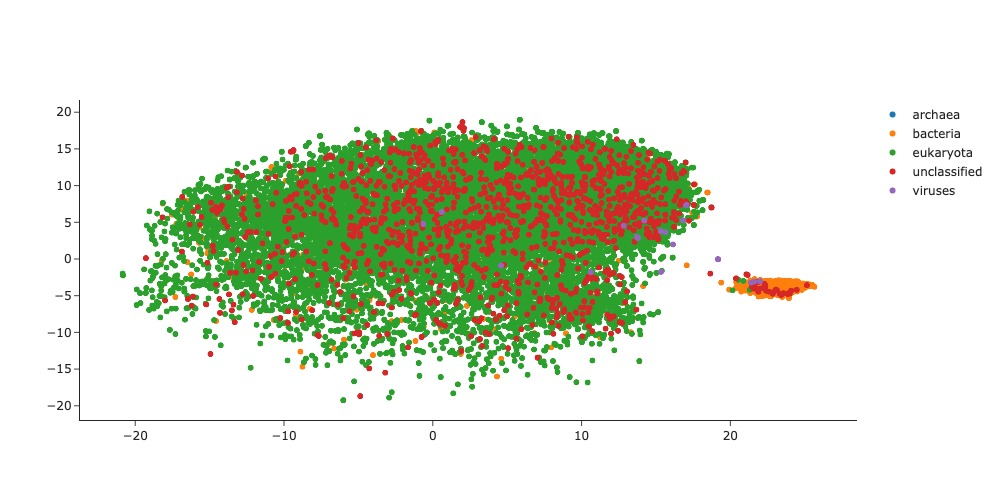

In [5]:
embedded_kmers = "../data/interim/binning/FL2015_4.kmers.ilr.bhsne.tsv"
embed_method = "bhsne"
norm_method = "ilr"
embedded = embedding(embedding=embedded_kmers, embed_method=embed_method, norm_method=norm_method, taxonomy=taxonomy)
df, fig = embedded.plot()
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

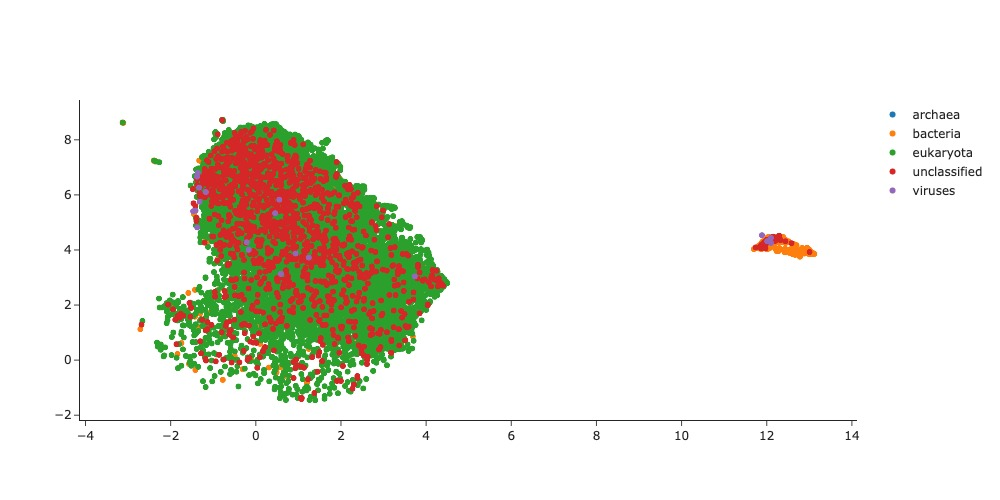

In [6]:
embedded_kmers = "../data/interim/binning/FL2015_4.kmers.am_clr.umap.tsv"
embed_method = "umap"
norm_method = "am_clr"
embedded = embedding(embedding=embedded_kmers, embed_method=embed_method, norm_method=norm_method, taxonomy=taxonomy)
df, fig = embedded.plot()
# fig.show()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

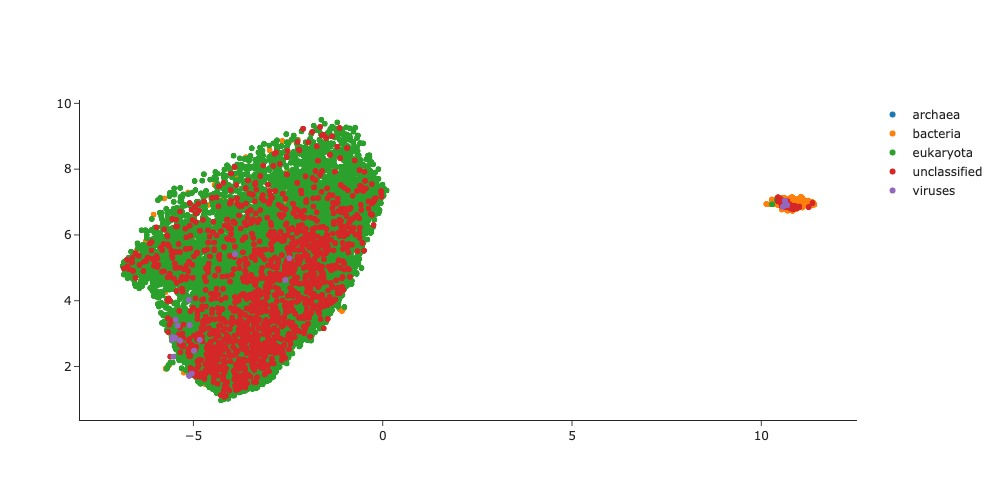

In [7]:
embedded_kmers = "../data/interim/binning/FL2015_4.kmers.ilr.umap.tsv"
embed_method = "umap"
norm_method = "ilr"
embedded = embedding(embedding=embedded_kmers, embed_method=embed_method, norm_method=norm_method, taxonomy=taxonomy)
df, fig = embedded.plot()
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

From inspecting the four graphs above, it appears any of the k-mer methods would be sufficient to separate _most_ of the bacteria from eukaryota. However, it is likely necessary at this point to re-compute the k-mer embedding for only the contigs in the bacterial "neighborhood" or to grab only the bacterial contigs then to re-compute the embedding. The four methods can be followed again, but with only the subset of contigs on the right of the graph or the orange colored contigs.

### Comparison of bacterial neighborhood to subset by taxonomy

First we are going to grab the bacterial neighborhood in the right of the above graph and compare this selection to assigned bacterial contigs.

In [8]:
bacterial_neighborhood = df[df['x'] > 5]
print(f"total contigs: {df.shape[0]:,}")
print(f"bacterial neighborhood: {bacterial_neighborhood.shape[0]:,}")
bacteria = df[df['superkingdom'] == 'bacteria']
print(f"bacterial contigs: {bacteria.shape[0]:,}")

total contigs: 47,195
bacterial neighborhood: 1,011
bacterial contigs: 1,663


So we are missing about 600 contigs that are in the neighborhood on the left with the eukaryota. There is the possibility that these ~600 contigs have been misclassified, or perhaps they resemble eukaryota more than their relatives. We can visualize the separation of these contigs between the two sets of contigs.

In [9]:
from skbio.stats.composition import ilr, clr, multiplicative_replacement
from sklearn.decomposition import PCA
from scipy.stats import gmean
from tsne import bh_sne

from umap import UMAP

In [10]:
counts = pd.read_csv("../data/interim/binning/FL2015_4.kmers.tsv", sep='\t', index_col='contig')
bacterial_counts = counts.loc[counts.index.isin(bacteria.index)]
neighborhood_counts = counts.loc[counts.index.isin(bacterial_neighborhood.index)]

print(f"bacterial counts shape: {bacterial_counts.shape}")

print(f"neighborhood counts shape: {neighborhood_counts.shape}")

bacterial counts shape: (1663, 512)
neighborhood counts shape: (1011, 512)


## Embedding comparisons

normalization and embedding on the subset contig counts may be found in the file: 

### Extraction of subsets

`$HOME/marine_drugs/marine_drugs/src/data/extract_bacteria_and_neighborhood_FL2015_4.sh`

### Normalization and Embedding

`$HOME/marine_drugs/marine_drugs/src/features/embed_FL2015_4_neighborhood_and_bacteria.sh`

We will visualize the embeddings as before, but now with the subsets

Subset: neighborhood
Norm Method: am_clr
Embed Method: bhsne


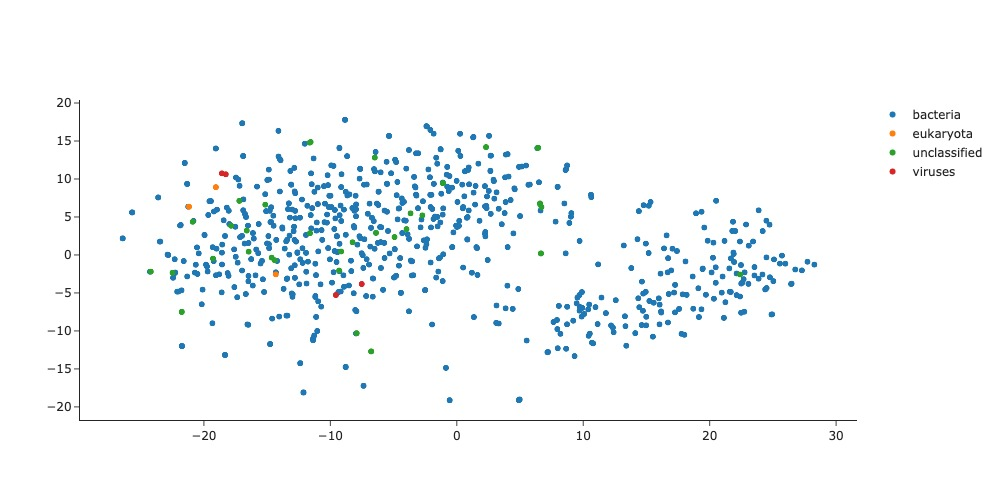

In [11]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "neighborhood"
norm_method = 'am_clr'
embed_method = 'bhsne'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: neighborhood
Norm Method: ilr
Embed Method: bhsne


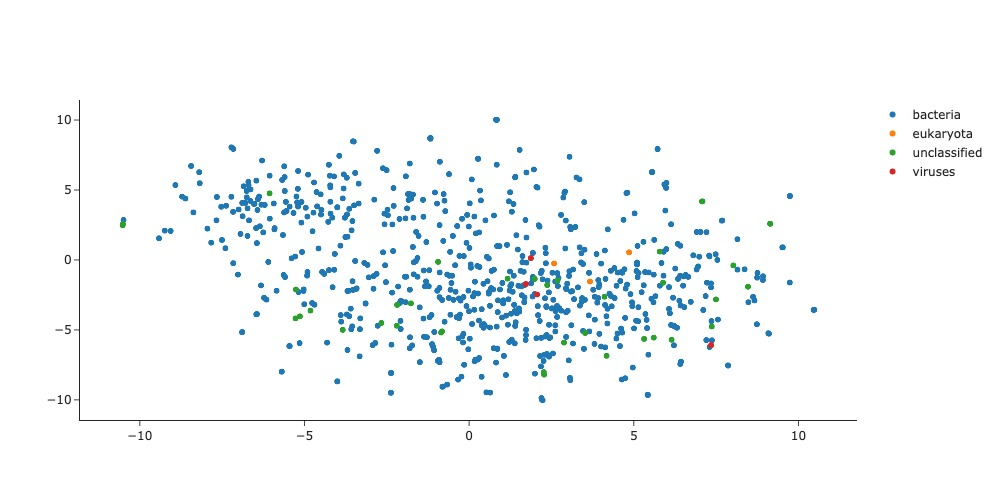

In [12]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "neighborhood"
norm_method = 'ilr'
embed_method = 'bhsne'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: neighborhood
Norm Method: am_clr
Embed Method: umap


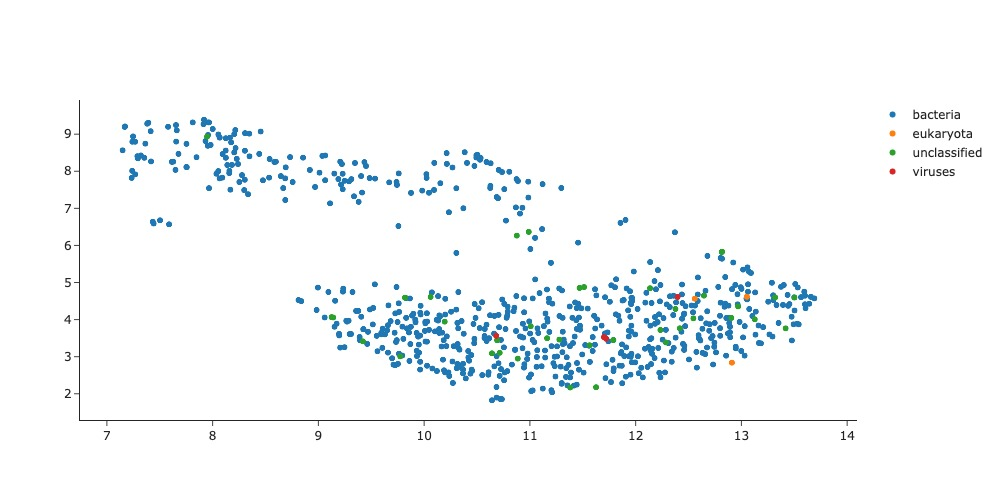

In [13]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "neighborhood"
norm_method = 'am_clr'
embed_method = 'umap'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: neighborhood
Norm Method: ilr
Embed Method: umap


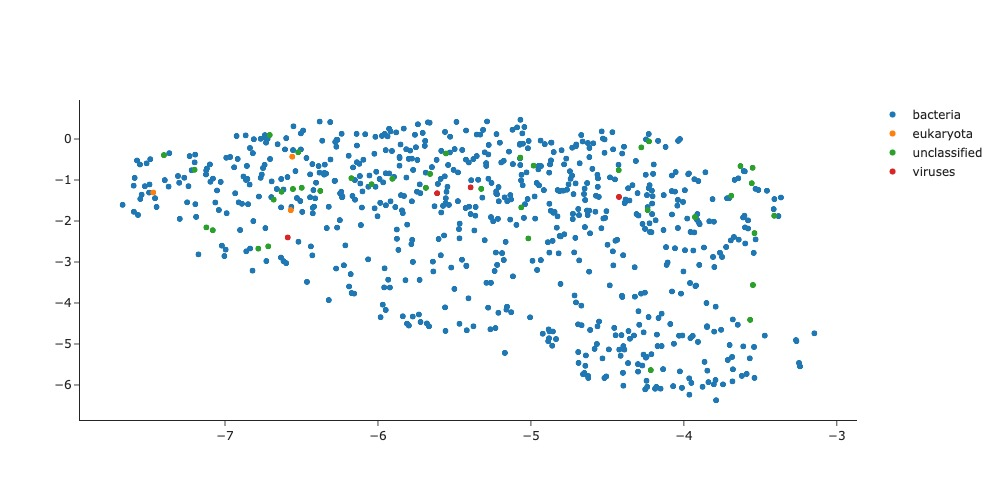

In [14]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "neighborhood"
norm_method = 'ilr'
embed_method = 'umap'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

## Comparisons with bacteria in the sample

Subset: bacteria
Norm Method: am_clr
Embed Method: bhsne


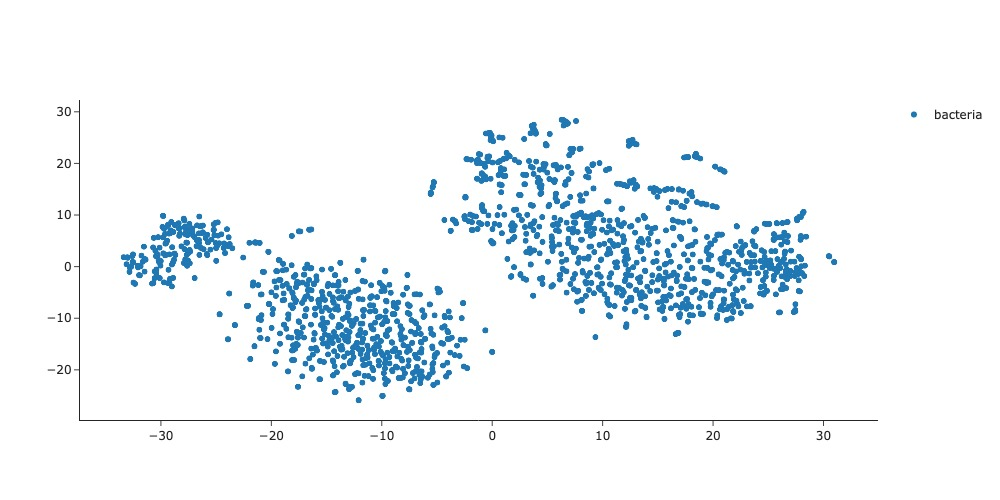

In [15]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "bacteria"
norm_method = 'am_clr'
embed_method = 'bhsne'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: bacteria
Norm Method: ilr
Embed Method: bhsne


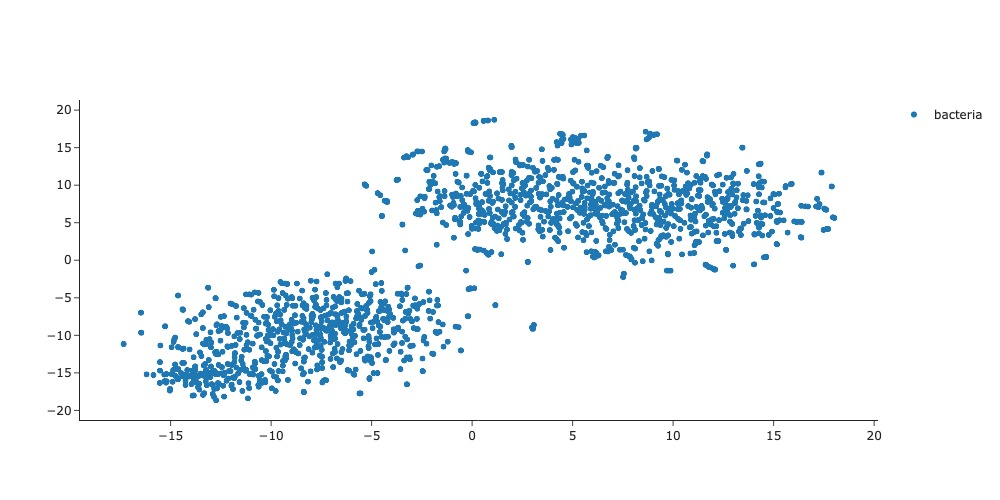

In [16]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "bacteria"
norm_method = 'ilr'
embed_method = 'bhsne'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: bacteria
Norm Method: am_clr
Embed Method: umap


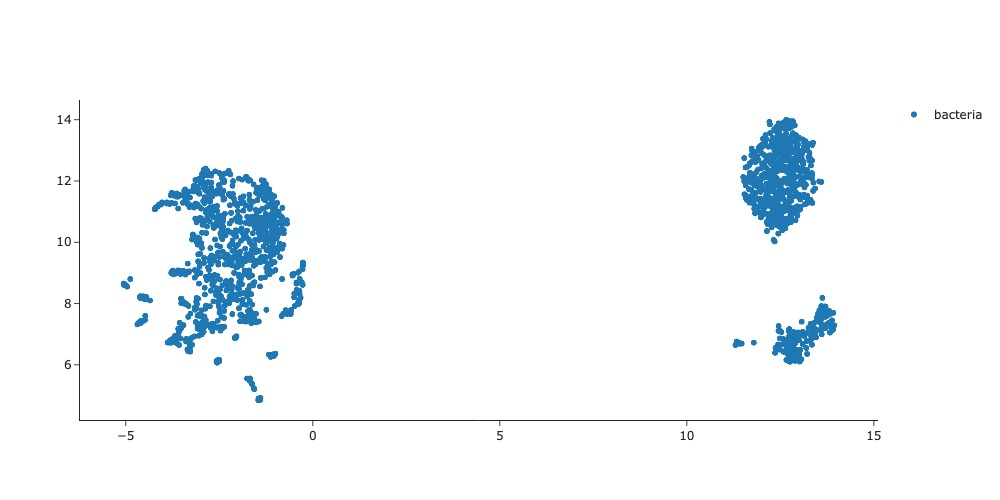

In [17]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "bacteria"
norm_method = 'am_clr'
embed_method = 'umap'
filepath = f"../data/interim/binning/FL2015_4.kmers.bacteria.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

Subset: bacteria
Norm Method: ilr
Embed Method: umap


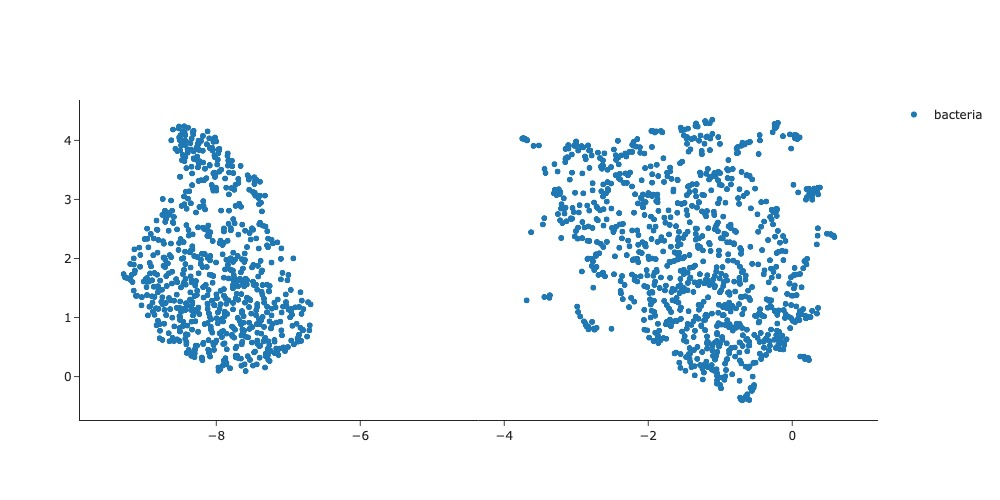

In [18]:
taxonomy = "../data/interim/binning/FL2015_4.taxonomy.tsv"
subset = "bacteria"
norm_method = 'ilr'
embed_method = 'umap'
filepath = f"../data/interim/binning/FL2015_4.kmers.{subset}.{norm_method}.{embed_method}.tsv"
#         embedding = pd.read_csv(filepath, sep='\t', index_col='contig')
embedded = embedding(embedding=filepath,
                     embed_method=embed_method,
                     norm_method=norm_method,
                     taxonomy=taxonomy)
df, fig = embedded.plot()
print(f"Subset: {subset}")
print(f"Norm Method: {norm_method}")
print(f"Embed Method: {embed_method}")
img_bytes = fig.to_image("jpeg", width=1000)
Image(img_bytes)

## Key Take-aways

There is quite a difference in the "k-mer space" of these contigs given the normalization method and embedding method performed. There is also a great difference between the "k-mer space" in terms of _when_ normalization and embedding are performed. i.e. normalization and embedding on the entire set of k-mer frequencies for the metagenome or on the subset. 

In the latter examples, the counts of the bacterial neighborhood and bacterial contigs were extracted then the same normalization/embedding algorithm was applied on the subset. The neighborhood subset performed more poorly (in terms of clear separation of different clusters) while the bacterial contigs set shows anywhere from zero to three or more clusters, depending on where you draw the boundaries and the normalization/embedding method used.

Moving forward, I think counts should be extracted from bacterial contigs then normalization/embedding performed. However, I am not yet convinced on which normalization and embedding method performs better. This requires exploration with ground truth (simulated communities, synthetic communities, GTDBTK datasets, etc.) that is outside of the scope of this study and has been partially conducted on some simulated communties and the GTDBTK dataset release 89. 

Perhaps important to note here, is the clear separation at the metagenome level between Eukaryota and Bacteria. Should normalization and embedding be performed in a recursive manner, similar to the recursive clustering that is performed in the autometa recursive clustering algorithm with taxonomy? I suspect we would encounter better local neighborhoods by subsetting the counts, then re-normalizing and re-embedding in this manner. Although this carries with it some computational overhead, given that the subsets are typically much smaller than the entire metagenome, this would likely not incur too high of a computational cost.